<script type="text/x-mathjax-config">
MathJax.Hub.Config({
  TeX: { equationNumbers: { autoNumber: "AMS" } }
});
</script>

<h1> Multiple Linear Regression </h1>

Libraries needed: <i>numpy</i>, <i>pandas</i>, <i>scipy</i>, <i>statsmodels</i>, <i>seaborn</i>, <i>matplotlib</i>,

<h2> 1. Theory </h2>

<h3> Working assumptions </h3>

<ul>
<li> We have a set of $M$ data samples $(x^{(m)},y^{(m)})$, $m=1,...,M$, the independent variables are in general vectors, and the dependent variables are scalars $y_m\in\mathbb{R}$.
</li>
</ul>

<ul>
<li> 
Assume $y$ is an M-dimensional column vector, $X\in\mathbb{R}^{M\times N}$ is the design matrix for which each row is represented by the independent variable of the data sample supplemented by $1$ as first element of the row, and $\varepsilon\sim\mathcal{N}(0,\Sigma)$ is normally distributed random noise with zero mean and covariance matrix $\Sigma\in\mathbb{R}^{M\times M}$. Let us further assume $\theta$ is the $N$-dimensional column vector of the regression coefficients. Then we model the data as
</li>
</ul>

\begin{align}\tag{1}
y = X\theta + \varepsilon,
\end{align}

\begin{align}\tag{2}
y = \begin{pmatrix}y^{(1)} \\ y^{(2)} \\ . \\ . \\ . \\ y^{(M)}\end{pmatrix}_{M\times 1}\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ X = \begin{pmatrix}1 & x^{(1)}_1 & x^{(1)}_2 & ... \\ 1 & x^{(2)}_1 & x^{(2)}_2 & ... \\ ... & ... & ... & ... \\ \ 1 & x^{(M)}_1 & x^{(M)}_2 & ...  \end{pmatrix}_{M\times N} \ \ \ \ \ \ \ \ \ \ \ \ \ \theta = \begin{pmatrix}\theta_0 \\ \theta_1 \\ . \\ . \\ . \\ \theta_N\end{pmatrix}_{N\times 1}
\end{align}

<ul style="list-style: none;">
<li>
Note that $\theta$ are estimators of the true underlying regression parameters $\Theta$. The true regression model is $y=X\Theta + \varepsilon$.
</li>
</ul>

<h3> The likelihood and the cost function</h3>

The task we want to accomplish is to find the best set of parameters $\theta$ which describe the model in Eq.(1). Eventually, this set of parameters can then be used to predict the value of $y^{(i)}$ given new data $x^{(i)}$. To obtain such set of parameters we want to define a cost function and minimize is with respect to the parameters themselves.

The cost function can be chosen by making use of our model assumptions, i.e. since $\varepsilon$ is normally distributed, we also have 

\begin{align}\tag{3}
(X\theta - y) \sim \mathcal{N}(0,\Sigma),
\end{align}

and so we can define the <i>likelihood</i> (the probability distribution of observing the data given a certain set of parameters $\theta$ and $\Sigma$) as

\begin{align}\tag{4}
\mathcal{P}(X|\theta,\Sigma) = \mathcal{L}(X|\theta,\Sigma) = \frac{1}{\sqrt{(2\pi)^M\det\Sigma}}\exp\left\{-\frac{1}{2}(X\theta-y)^T\Sigma^{-1}(X\theta-y)\right\}.
\end{align}

We want to maximize the above probability distribution, i.e. find the set of parameters which maximizes the likelihood. This is equivalent to minimizing the negative log-likelihood which we define as our cost function 

\begin{align}\tag{5}
J(\theta,\Sigma) &= -\log\mathcal{L}(X|\theta,\Sigma) = \frac{M}{2}\log\left[2\pi\right] +\frac{1}{2}\log\left[\det\Sigma\right] + \frac{1}{2}(X\theta - y)^T\Sigma^{-1}(X\theta-y). %\\
%&= \frac{M}{2}\log\left[2\pi\right] +\frac{1}{2}\log\left[\det\Sigma\right] +\frac{1}{2}\sum_{j,k=1}^M \left[\left(\sum_{n=1}^N X_{jn}\theta_n - y_j\right)\Sigma^{-1}_{jk}\left(\sum_{n=1}^N X_{kn}\theta_n - y_k\right)\right]
\end{align}

<h3> Minimizing the cost function and closed form solution for the parameters $\theta$</h3>

To minimize the cost function $J(\theta,\Sigma)$ with respect to the parameters $\theta$ we first need to take the derivative of Eq.(5). Only the last term depends on $\theta$, so let's focus on it and rewrite it by explicitating the product:

\begin{align}\tag{6}
\frac{1}{2}(X\theta - y)^T\Sigma^{-1}(X\theta-y) = \frac{1}{2}\theta^TX^T\Sigma^{-1}X\theta - \frac{1}{2}y^T\Sigma^{-1}X\theta - \frac{1}{2}\theta^TX^T\Sigma^{-1}y + \frac{1}{2}y^Ty
\end{align}

The cost function is a scalar, and so is each term of the above equation. Recall that for a scalar $s^T=s$ holds. Because $\Sigma^T = \Sigma$ we can combine the second and third term since

\begin{align}\tag{7}
\theta^TX^T\Sigma^{-1}y = \left(\theta^TX^T\Sigma^{-1}y \right)^T = y^T\Sigma^{-1}X\theta.
\end{align}

The derivative of the first term can be found by recalling that for two vectors $A,B\in\mathbb{R}^{N}$ a holds

\begin{align}\tag{8}
\frac{d}{dA}(A^TB^T) = \frac{d}{dA}(BA) = B,
\end{align}

and so for the first term of Eq.(6) we obtain

\begin{align}\tag{9}
\frac{d}{d\theta}\left(\theta^TX^T\Sigma^{-1}X\theta\right) = \left(X^T\Sigma^{-1}X\theta\right)^T+ \theta^TX^T\Sigma^{-1}X = 2\theta^TX^T\Sigma^{-1}X
\end{align} 

Putting all together we can finally calculate the gradient (which is a column vector) of the cost function and obtain

\begin{align}\tag{10}
\nabla_\theta J(\theta,\Sigma)= \left[\theta^TX^T\Sigma^{-1}X - y^T\Sigma^{-1}X\right]^T = X^T\Sigma^{-1}(X\theta-y)
\end{align}

By requiring the gradient to be zero and solving for $\theta$ we get

\begin{align}\tag{11}
\theta = \left(X^T\Sigma^{-1}X\right)^{-1}X^T\Sigma^{-1}y 
\end{align}

Let us now assume the covariance matrix is diagonal with constant diagonal matrix elements, i.e. $\Sigma = \mathbb{I}\sigma^2$, then Eq.(11) simplifies into

\begin{align}\tag{12}
\theta = \left(X^TX\right)^{-1}X^Ty 
\end{align}

<h3> Error estimates for the parameters $\theta$ </h3>

Once we obtain the estimates for the parameters $\theta$ we might want to assess some kind of error bar on them. Recall that $\theta$ are estimators of the true underlying regression parameters $\Theta$ and that $E[\varepsilon]=0$, then one has

\begin{align}\tag{13}
E[\theta] = E\left[\left(X^TX\right)^{-1}X^Ty\right] = \left(X^TX\right)^{-1}X^TE[y]=\left(X^TX\right)^{-1}X^TE[X\Theta + \varepsilon] = \Theta + \left(X^TX\right)^{-1}X^TE[\varepsilon] = \Theta,
\end{align}

so the parameters $\theta$ obtained via Eq.(12) are unbiased estimators of the true regression parameters $\Theta$. We can then calculate the variance of $\theta$ as

\begin{align}\tag{14}
\sigma_\theta^2 = Var(\theta) = E\left[\left(\theta - E[\theta]\right)^2\right] = E\left[\left(\left(X^TX\right)^{-1}X^Ty - \Theta\right)^2\right]
\end{align}

where in the last equality we made use of the expression for the parameters from Eq.(12). Using the true regression model we can get rid of $y$ in the above equation and we obtain

\begin{align}\tag{15}
\sigma_\theta^2  = E\left[\left(\left(X^TX\right)^{-1}X^T(X\Theta + \varepsilon) - \Theta\right)^2\right] = E\left[ \left(\Theta + \left(X^TX\right)^{-1}X^T\varepsilon - \Theta\right)^2\right] = \left[\left(X^TX\right)^{-1}X^T\right]^2E\left[\varepsilon^2\right]
\end{align}

By assumptions we have $\sigma^2 = E[\varepsilon^2]$. Furthermore, since $X^TX$ is symetric, we have

\begin{align}\tag{16}
\left[\left(X^TX\right)^{-1}X^T\right]^2 = \left(X^TX\right)^{-1}X^T\left[\left(X^TX\right)^{-1}X^T\right]^T = \left(X^TX\right)^{-1}X^TX\left(XX^T\right)^{-1} = \left(X^TX\right)^{-1},
\end{align}

and so we finally obtain

\begin{align}\tag{17}
\sigma_\theta^2 = \sigma^2\left(X^TX\right)^{-1}.
\end{align}

Notice that $\sigma^2 = E[(y-X\theta)^2]$ and so it is the variance of the squared residuals, and $\sigma_\theta^2$ is the variance-covariance matrix of the regression parameters. By taking the square root of its diagonal elements we find the standard deviation of the parameters $\theta$. 

<h3> Solving for the unknown $\sigma^2$</h3>

While the parameters from Eq.(12) do not require the knowledge of the unknown variance $\sigma^2$, their variance $\sigma_\theta^2$ does. Thus, we need to minimize the cost function with respect to $\sigma^2$ as well. The derivative with respect to $\sigma^2$ is given by (note that $\log[\det\mathbb{I}\sigma^2]=M\log[\sigma^2]$):

\begin{align}\tag{18}
\frac{\partial J(\theta,\Sigma)}{\partial\sigma^2} = -\frac{1}{2\sigma^2}\left[\frac{1}{\sigma^2}(X\theta-y)^T(X\theta-y) - M\right]
\end{align}

Setting the above equation to zero and solving for $\sigma^2$ we get

\begin{align}\tag{19}
\sigma^2 = \frac{1}{M}(X\theta-y)^T(X\theta-y).
\end{align}

<h3> Predictions </h3>

Suppose now that we fit our model and we obtain the value of the coefficients $\theta$. Now suppose we are given a new set of data $x_p$ and we are requested to predict the value of $y_p$. Note that $x_p$ now is a columns vector. We can first calculate the predicted point value as

\begin{align}\tag{20}
y_p = x_p^T\theta.
\end{align}

Then, we would like to calculate the variance of the estimate so that we can give some error bar to our predicted value:

\begin{align}\tag{22}
Var(y_p) = E\left[\left(y_p - E[y_p]\right)^2\right] = E\left[\left(x_p^T\theta - x_p^TE[\theta]\right)^2\right] = E\left[x_p^T\left(\theta-E[\theta]\right)^2x_p\right] = x^T_pE\left[\left(\theta-E[\theta]\right)^2\right] x_p = x^T_p\sigma_\theta^2x_p,
\end{align}

since we have 

\begin{align}\tag{23}
\sigma^2_\theta = Var(\theta) = E\left[\left(\theta - E[\theta]\right)^2\right].
\end{align}

Using Eq.(17) one finally has

\begin{align}\tag{24}
\sigma^2_{y_p} = \sigma^2x^T_p\left(X^TX\right)^{-1}x_p.
\end{align}

If we had many new $x_p$ data points for with we want to predict $y_p$ we can, as before, build a design matrix $X_P\in\mathbb{R}^{p\times N}$ and define the vector of the predicted values $Y_p$ so that to calculate the variance of the predictions we use

\begin{align}\tag{24}
\sigma^2_{Y_p} = \sigma^2X_P\left(X^TX\right)^{-1}X_P^T.
\end{align}

<h2> 2. Python implementation </h2>

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pylab 
from IPython.display import display
import scipy.stats as stats
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

# Function to normalize columns of a dataframe
def normalize(df,cols=[]):
    if (len(cols) == 0):
        cols = df.columns.values
    for c in cols:
        cmin = np.min(df[c])
        cmax = np.max(df[c])
        df[c] = df[c].apply(lambda r: (r-cmin)/(cmax-cmin))
    return df

# Function to build design matrix
def getDesMtx(df,features=[]):
    M = df.shape[0]
    N = len(features) + 1
    X = np.ones((M,N),dtype=float)
    for idx,c in enumerate(features):
        X[:,idx+1] = df[c]
    return X

# wrapper class for linear regression
class _linearModel:
    def __init__(self,X,y):
        # Build design matrix
        self.M, self.N = X.shape
        self.X = X
        self.XT = np.transpose(self.X)
        self.XTX = np.dot(self.XT,self.X)
        self.XTX_inv = np.linalg.pinv(self.XTX)
        self.y = y
        self.theta = np.zeros([self.N])
        self.vartheta = np.zeros([self.N])
        self.stdevtheta = np.zeros([self.N])
        self.varnoise = 1.0
        self.t = np.zeros([self.N])
        self.theta_min = np.zeros([self.N])
        self.theta_max = np.zeros([self.N])
        self.summary = pd.DataFrame(columns = ['param','stdev','t','95%min','95%max'])
        return
    
    # Find parameters (equation 12)
    def _getTheta(self):
        self.theta = np.dot(np.dot(self.XTX_inv,self.XT),self.y)
        return

    # Find variance of the noise (equation 19)
    def _getVarNoise(self):
        delta = np.dot(self.X,self.theta) - self.y
        self.varnoise = np.dot(np.transpose(delta),delta)/self.M
        return 

    # Find variance of the parameters (equation 17)
    def _getVarTheta(self):
        self._getVarNoise()
        self.vartheta = self.varnoise * np.diagonal(self.XTX_inv)
        return

    # Test null hypothesis (t is how far we are from the null hypothesis
    # in units of standard deviations)
    def _getT(self):
        h = [0.0 for i in range(self.N)]
        self.t = np.abs(h - self.theta) / self.stdevtheta
        return

    # Return 95% confidence interval
    def _getCI(self):
        self.theta_min = self.theta - 1.96 * self.stdevtheta
        self.theta_max = self.theta + 1.96 * self.stdevtheta
        return 

    # Summarize statistics and parameters in a dataframe
    def _summarize(self):
        for i in range(self.N):
            self.summary.loc[self.summary.shape[0]] = [self.theta[i],self.stdevtheta[i],
                                                      self.t[i],self.theta_min[i],
                                                      self.theta_max[i]]
        return
    
    # Predict y given independent variable
    def predict(self,X):
        return np.dot(X,self.theta)
    
    # Variance of the predictions (equation 24)
    def varpredict(self,Xp):
        return self.varnoise * np.diagonal(np.dot(np.dot(Xp,self.XTX_inv),np.transpose(Xp)))
    
    # Find parameters and statistics
    def solve(self):
        # Find parameters and their standard deviation and variance
        self._getTheta()
        self._getVarTheta()
        self.stdevtheta = np.sqrt(self.vartheta)
        # Calculate 95% confidence interval
        self._getCI()
        # Test the null hypothesis
        self._getT()
        # Summarize in dataframe
        self._summarize()
        return
    

<h2> 3. Test on synthetic dataset  - Multivariate regression </h2>

<h3> Data generation </h3>

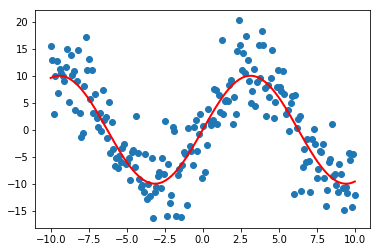

In [3]:
np.random.seed(10)
M = 200
x = np.linspace(-10,10,M)
sigma_noise2 = 20.0
def ytrue(x):
    return 10.0*np.sin(0.5*x)
y = ytrue(x) + np.random.normal(loc=0.0,scale=np.sqrt(sigma_noise2),size=(M))

fig,ax = plt.subplots()

ax.scatter(x,y)
ax.plot(x,ytrue(x),color='red',lw=2.0)

plt.show()

<h3> Model fitting </h3>

      param     stdev          t    95%min    95%max
0  0.112198  0.591284   0.189754 -1.046719  1.271116
1  4.445677  0.237813  18.694041  3.979564  4.911790
2  0.011244  0.036658   0.306721 -0.060606  0.083093
3 -0.148478  0.009250  16.051130 -0.166608 -0.130347
4 -0.000078  0.000406   0.191363 -0.000873  0.000718
5  0.000970  0.000080  12.072321  0.000813  0.001128


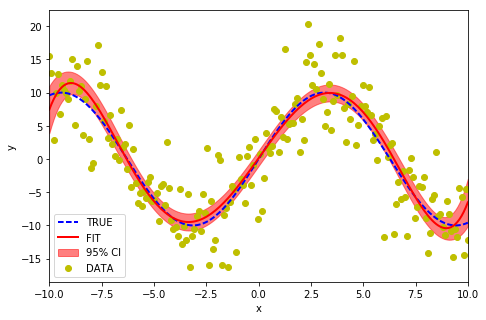

In [4]:
# Build design matrix
N = 6
X = np.ones((len(x),N),dtype=float)
for n in range(1,N):
    X[:,n] = x**n
lr = _linearModel(X=X,y=y)
lr.solve()
print (lr.summary)


xp = x #np.linspace(1.1*np.min(x),1.1*np.max(x),2*len(x))
Xp = np.ones((len(xp),N),dtype=float)
for n in range(1,N):
    Xp[:,n] = xp**n

fig,ax = plt.subplots(figsize=(7.5,5))
ax.plot(xp,ytrue(xp),color='b',lw= 2.0,ls='--',label='TRUE')
ax.plot(xp,lr.predict(Xp),color='red',lw=2.0,label='FIT')

# Display 95% confidence interval for the predictions
var_pred = (lr.varpredict(Xp))
stdev_pred = np.sqrt(var_pred)
lbound = lr.predict(Xp) + 1.96*stdev_pred
ubound = lr.predict(Xp) - 1.96*stdev_pred
ax.fill_between(xp,lbound,ubound,color='red',alpha=0.5,label='95% CI')

ax.set_xlim([np.min(xp),np.max(xp)])

# Plot data
ax.scatter(x,y,color='y',label='DATA')

ax.set_xlim([np.min(xp),np.max(xp)])
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend(loc='lower left')

plt.show()

Looking at the $t$-values we see that terms with odd powers of $x$ have more significance than the ones with even powers. This makes sense since we generated the data using a $sin(x)$ which is an odd function.

<h3> Check hypothesis for the residuals (check they are normally distributed) </h3>

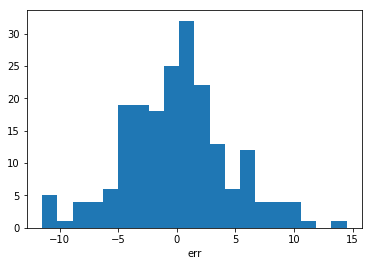

In [5]:
# Check distribution of errors
err = (lr.predict(X) - y)
# Distribution plot
fig,ax = plt.subplots()
ax.hist(err,bins=20)
ax.set_xlabel('err')
plt.show()

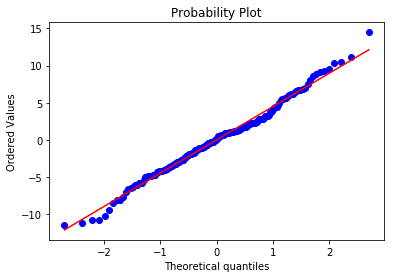

In [6]:
#QQ plot
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(err, dist="norm", plot=pylab)
pylab.show()

<h3> Check with built-in libraries </h3>

In [7]:
# Cross-check with built-in libraries
from statsmodels.formula.api import ols
import pandas as pd
data = pd.DataFrame({'x': x, 'x2': x**2, 'x3': x**3, 'x4': x**4, 'x5': x**5,'y': y})
# Fit the model
model = ols("y ~ x + x2 + x3 + x4 + x5", data).fit()

In [8]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     106.7
Date:                Wed, 26 Apr 2017   Prob (F-statistic):           9.91e-54
Time:                        14:53:47   Log-Likelihood:                -582.79
No. Observations:                 200   AIC:                             1178.
Df Residuals:                     194   BIC:                             1197.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1122      0.600      0.187      0.8

In [9]:
print (lr.summary)

      param     stdev          t    95%min    95%max
0  0.112198  0.591284   0.189754 -1.046719  1.271116
1  4.445677  0.237813  18.694041  3.979564  4.911790
2  0.011244  0.036658   0.306721 -0.060606  0.083093
3 -0.148478  0.009250  16.051130 -0.166608 -0.130347
4 -0.000078  0.000406   0.191363 -0.000873  0.000718
5  0.000970  0.000080  12.072321  0.000813  0.001128


The numbers check out pretty well, so we are happy!

<h2> 4. Test on real data - Multiple regression </h2>

We now test our regression routines on a real dataset. The set of data we want to study here is a subset of <a href="http://mreed.umtri.umich.edu/mreed/downloads/anthro/ansur/Gordon_1989.pdf">the 1988 U.S. Army Anthropometry survey</a> found <a href='http://mreed.umtri.umich.edu/mreed/downloads.html#ansur'>here</a>, which reports values for a bunch of anthropometric variables. Here we focus only on three of them, namely <i>Stature</i> in cm, <i>Waist Circumference</i> in cm and <i>Weight</i> in kg. We want to find a linear model to describe the weight variable given the other two.

In [10]:
from scipy.stats import norm
# Import data
df = pd.read_csv('../DATASETS/weight_height.csv')
df = df.drop(df.columns.values[0],axis=1) #drop index column
display(df.head())
print (df.shape)

,H_cm,WC_cm,W_kg
0,173.5,94.9,88.3
1,183.0,91.6,86.5
2,172.6,83.4,71.3
3,178.3,82.5,81.6
4,166.9,91.4,75.6


(3982, 3)


Let's visualize the data and explore the data distribution and correlations amongst the variables.

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


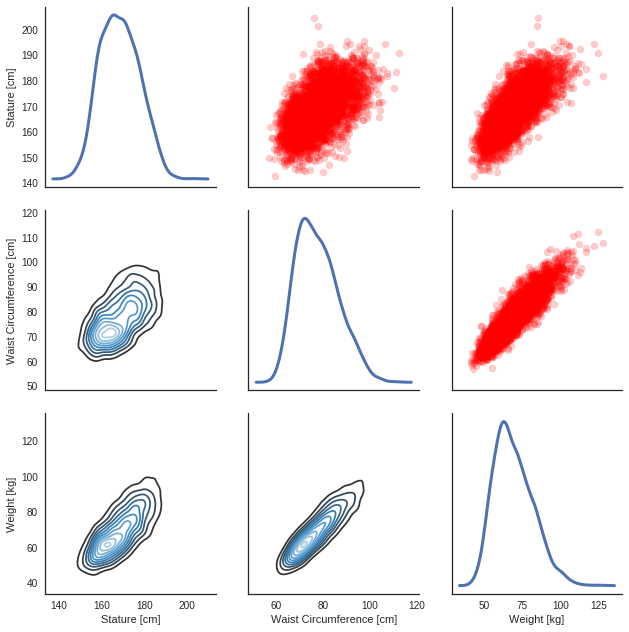

In [11]:
import seaborn as sns
sns.set(style="white")

lab_list = ['Stature [cm]', 'Waist Circumference [cm]','Weight [kg]']
g = sns.PairGrid(df, diag_sharey=False,size=3)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter,color='red',alpha=0.2)
g.map_diag(sns.kdeplot, lw=3)
for i in range(3):
    g.axes[2,i].set(xlabel=lab_list[i])
    g.axes[i,0].set(ylabel=lab_list[i])

From the graphs above it looks like weight is much more correlated with waist circumference than with stature, while stature and waist circumference don't look that much correlated. We can visualize the correlation by calculating the covariance matrix and representing it on a head map:

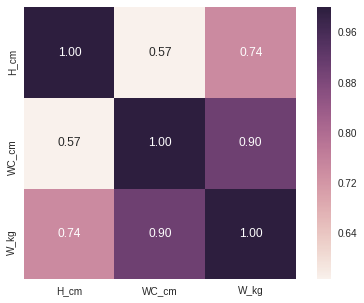

In [12]:
fig = plt.figure(figsize=(7.5,5))
hm = sns.heatmap(df.corr(), vmax=1.0, square=True,annot=True,fmt=".2f")
plt.show()

Darker colors represent higher correlation. The numbers represent the entries of the covariance matrix. Let's first normalize the data so that all the values in the dataframe will be in between 0 and 1 (this will help us to get values for the fitting parameters which are "natural" and on the same scale).

In [13]:
# Normalize the data in the range 0,1
df = normalize(df)
display(df.head())

,H_cm,WC_cm,W_kg
0,0.500000,0.687726,0.543353
1,0.654723,0.628159,0.522543
2,0.485342,0.480144,0.346821
3,0.578176,0.463899,0.465896
4,0.392508,0.624549,0.396532


Since waist circumference looks to be the most correlated variable with the weight, we can first try to use a simple linear regression to model waist circumference vs weight and then we can include also the stature feature. We can then compare the distribution of the errors for the predictions with these two models.

In [14]:
# Build design matrix
X = getDesMtx(df,features=['WC_cm'])
y = df['W_kg']
# Define linear model
lms = _linearModel(X,y)
lms.solve()
print(lms.summary)

      param     stdev           t    95%min    95%max
0  0.012979  0.002528    5.133148  0.008023  0.017934
1  0.827310  0.006182  133.826242  0.815193  0.839426


In [15]:
# Build design matrix
X = getDesMtx(df,features=['WC_cm','H_cm'])
y = df['W_kg']
# Define linear model
lm = _linearModel(X,y)
lm.solve()
print(lm.summary)

      param     stdev           t    95%min    95%max
0 -0.062074  0.002363   26.264152 -0.066706 -0.057442
1  0.652098  0.005691  114.590936  0.640944  0.663252
2  0.335922  0.006189   54.280969  0.323793  0.348052


We can now plot the distribution of the errors for the two models:

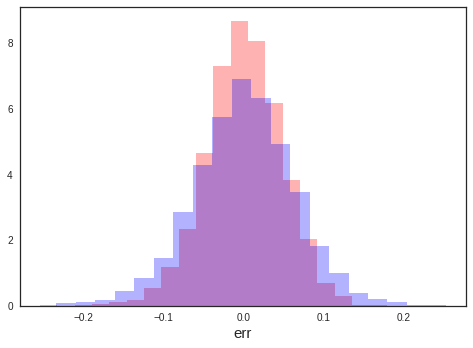

In [16]:
# Plot the errors distribution
err_simple = lms.predict(getDesMtx(df,features=['WC_cm'])) - y
err = lm.predict(getDesMtx(df,features=['WC_cm','H_cm'])) - y
fig,ax = plt.subplots()
ax.hist(err,bins=20,normed=True,color='red',alpha=0.3)
ax.hist(err_simple,bins=20,normed=True,color='blue',alpha=0.3)
ax.set_xlabel('err',fontsize=15)
plt.show()

The errors of the model including both the waist circumference and the stature are smaller and thus spread on a narrower interval. The value of the cost function calculated at the estimated values for the parameters is:

In [17]:
delta = lms.predict(getDesMtx(df,features=['WC_cm'])) - y
err_tot_simple = np.dot(np.transpose(delta),delta)
print ("Cost simple regression: " + str(err_tot_simple))
delta = lm.predict(getDesMtx(df,features=['WC_cm','H_cm'])) - y
err_tot = np.dot(np.transpose(delta),delta)
print ("Cost multiple regression: " + str(err_tot))

Cost simple regression: 15.5470278757
Cost multiple regression: 8.93540412584


The multiple regression model seems to give a better description of the data, the errors are smaller and the cost function is also smaller. Note, however, that in general having smaller errors does not mean we have a better model (we could be overfitting).

We can now visualize the plane given by the regression model in a 3d plot:

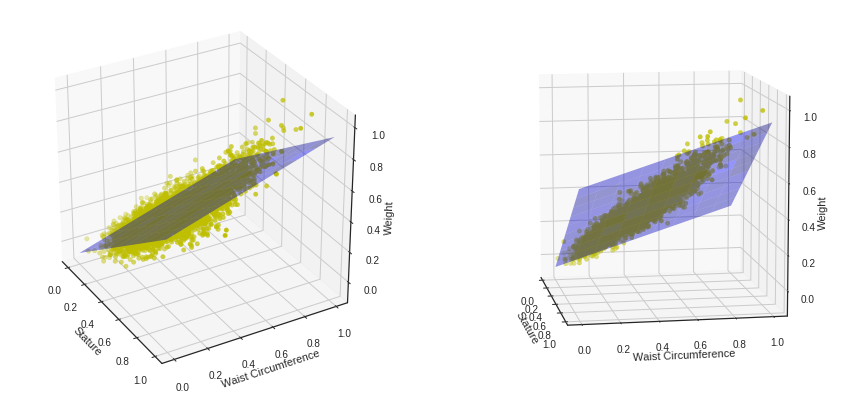

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(121, projection='3d')

D = 10
x_surf = np.linspace(0, 1, D)                # generate a mesh
y_surf = np.linspace(0, 1, D)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

Xp = np.ones((D*D,3),dtype=float)
Xp[:,1] = x_surf.ravel()
Xp[:,2] = y_surf.ravel()
out = lm.predict(Xp)

ax.scatter(df['H_cm'],df['WC_cm'],df['W_kg'],c='y')
ax.plot_surface(x_surf, y_surf,out.reshape(x_surf.shape),rstride=1,cstride=1,color='b',alpha = 0.4)
ax.set_xlabel('Stature')
ax.set_ylabel('Waist Circumference')
ax.set_zlabel('Weight')

# rotate the axes
ax.view_init(30, -30)

ax = fig.add_subplot(122,projection='3d')
ax.scatter(df['H_cm'],df['WC_cm'],df['W_kg'],c='y')
ax.plot_surface(x_surf, y_surf,out.reshape(x_surf.shape),rstride=1,cstride=1,color='b',alpha = 0.4)
ax.set_xlabel('Stature')
ax.set_ylabel('Waist Circumference')
ax.set_zlabel('Weight')

# rotate the axes
ax.view_init(10,-10)

plt.show()